In [20]:
# Dependencies
import numpy as np
import datetime as dt
import pandas as pd

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

import matplotlib.pyplot as plt

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
results = session.query(Measurement.date, Measurement.tobs).\
    filter(func.strftime("%m", Measurement.date) == "06").all()

In [5]:
#  3. Convert the June temperatures to a list.
#june_temp = list(np.ravel(results))
june_temp = [result[1] for result in results]

In [6]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_df = pd.DataFrame({"June Temperature":june_temp})

In [7]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_df.describe()

,June Temperature
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [8]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
dec_results = session.query( Measurement.tobs).\
    filter(func.strftime("%m", Measurement.date) == "12").all()

In [9]:
# 7. Convert the December temperatures to a list.
#dec_temp = list(np.ravel(dec_results))
dec_temp = [dec_results[0] for dec_results in dec_results]


In [10]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_df = pd.DataFrame({"December Temperature":dec_temp})

In [11]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_df.describe()

,December Temperature
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


## D3 : Additional queries / analysis for README.md

<AxesSubplot:xlabel='date'>

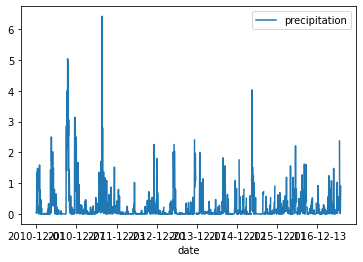

In [18]:
# ADDITIONAL QUERIES FOR README.md DELIVERABLE
                                                                                                             
dec_prcp = session.query(Measurement.date, Measurement.prcp).filter(func.strftime("%m", Measurement.date) == "12").all()
df = pd.DataFrame(dec_prcp, columns=['date','precipitation'])
df.set_index(df['date'], inplace=True)    
df = df.sort_index()

df.plot()

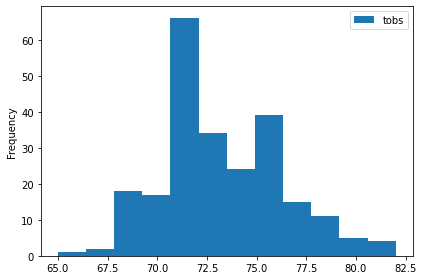

In [21]:
# Additional query 2 for README.md

results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(func.strftime("%m", Measurement.date) == "06").all()

df = pd.DataFrame(results, columns=['tobs'])

# Plot histogram
df.plot.hist(bins=12)
plt.tight_layout()